## More on Words

 - Sentence tokenizing
 - Distinctive language
 - Parsing: quoted lines, parentheticals, paragraphs, exclamations
 - Pandas Data Frames

In [94]:
import nltk
import collections
import pandas as pd
%matplotlib inline

In [6]:
%ls '../../Texts'

betteredge.md  clack.md  moonstone.md


In [7]:
moonstone = open('../../Texts/moonstone.md').read()

In [8]:
moonParts = moonstone.split('\n## ')

In [9]:
len(moonParts)

13

In [15]:
bet, clack, bruff, blake = [moonParts[i] for i in [2,4,5,6]]

In [16]:
[part[:200] for part in [bet, clack, bruff, blake]]

['First Period\n\nTHE LOSS OF THE DIAMOND (1848)\n\nThe events related by GABRIEL BETTEREDGE, house-steward in the service\nof JULIA, LADY VERINDER.\n\n### Chapter I\n\nIn the first part of ROBINSON CRUSOE, at p',
 'First Narrative\n\nContributed by MISS CLACK; niece of the late SIR JOHN VERINDER\n\n### Chapter I\n\nI am indebted to my dear parents (both now in heaven) for having had\nhabits of order and regularity inst',
 'Second Narrative\n\nContributed by MATHEW BRUFF, Solicitor, of Gray’s Inn Square\n\n### Chapter I\n\nMy fair friend, Miss Clack, having laid down the pen, there are two\nreasons for my taking it up next, in ',
 'Third Narrative\n\nContributed by FRANKLIN BLAKE\n\n### Chapter I\n\nIn the spring of the year eighteen hundred and forty-nine I was\nwandering in the East, and had then recently altered the travelling\nplans']

In [17]:
allNarrators = [bet, clack, bruff, blake]

In [43]:
allTokens = [nltk.word_tokenize(narr.lower().replace('-', ' ')) 
            for narr in allNarrators]

In [73]:
def cleanAndTokenize(text):
    narrReplaced = text.lower()
    for mark in ["–", '-', '*']:
        narrReplaced = narrReplaced.replace(mark, ' ')
    tokens = nltk.word_tokenize(narrReplaced)
    return tokens

In [74]:
allTokens = [cleanAndTokenize(text) for text in allNarrators]

In [75]:
collections.Counter(allTokens[0][:50]).most_common(10)

[('the', 5),
 (',', 4),
 ('of', 3),
 ('#', 3),
 ('first', 2),
 ('in', 2),
 ('period', 1),
 ('loss', 1),
 ('diamond', 1),
 ('(', 1)]

In [62]:
len(allTokens)

4

In [63]:
narrCounts = []
for narr in allTokens: 
    narrCounts.append(collections.Counter(narr))

In [64]:
len(narrCounts)

4

In [65]:
type(narrCounts[0])

collections.Counter

In [66]:
for narr in narrCounts:
    print(narr.most_common(10))

[(',', 6283), ('the', 4865), ('.', 3453), ('to', 2725), ('of', 2143), ('i', 2077), ('and', 2045), ('in', 1687), ('a', 1509), ('“', 1212)]
[(',', 2107), ('the', 1608), ('.', 1388), ('to', 1089), ('i', 970), ('of', 861), ('and', 688), ('in', 629), ('a', 581), ('my', 514)]
[(',', 709), ('the', 674), ('.', 412), ('of', 397), ('to', 393), ('i', 330), ('in', 238), ('and', 220), ('that', 170), ('a', 162)]
[(',', 2976), ('the', 2614), ('.', 1933), ('i', 1751), ('to', 1633), ('of', 1237), ('and', 1036), ('you', 949), ('in', 879), ('“', 780)]


In [76]:
narrCountsDF = pd.DataFrame(narrCounts, 
                     index=["bet", "clack", "bruff", "blake"]).fillna(0).T

In [80]:
betTokens = allTokens[0]

In [81]:
len(betTokens)

95988

In [84]:
totalNumTokensForNarrators = [len(tokensForNarrator) 
                              for tokensForNarrator in allTokens]

In [90]:
proportions = narrCountsDF / totalNumTokensForNarrators

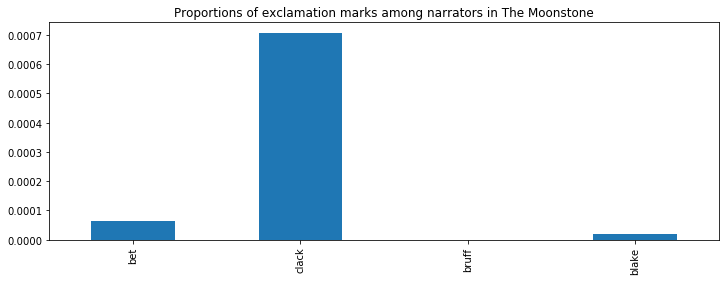

In [107]:
proportions.loc['christian'].plot(kind='bar', figsize=(12, 4),
                          title="Proportions of exclamation marks among narrators in The Moonstone")

In [111]:
proportions['average'] = proportions.mean(axis=1)

In [113]:
proportions['clackness'] = proportions['clack'] - proportions['average']

In [119]:
proportions.sort_values('clackness', ascending=False)

,bet,clack,bruff,blake,average,clackness
!,0.003490,0.006748,0.002207,0.004731,0.004294,0.002454
she,0.006449,0.007483,0.003678,0.003576,0.005296,0.002186
godfrey,0.000542,0.003456,0.001062,0.000246,0.001326,0.002129
aunt,0.000302,0.002857,0.000082,0.000151,0.000848,0.002009
my,0.010897,0.013986,0.011033,0.012944,0.012215,0.001771
.,0.035973,0.037768,0.033671,0.036579,0.035998,0.001770
dear,0.000219,0.002449,0.000245,0.000170,0.000771,0.001678
rachel,0.002219,0.003782,0.001062,0.001930,0.002248,0.001534
her,0.008709,0.009224,0.008009,0.004996,0.007735,0.001490
a,0.015721,0.015809,0.013240,0.012584,0.014338,0.001471


In [120]:
proportions['betness'] = proportions['bet'] - proportions['average']

In [122]:
proportions.sort_values('betness', ascending=True)

,bet,clack,bruff,blake,average,clackness,betness
i,0.021638,0.026394,0.026970,0.033135,0.027034,-0.000640,-0.005396
of,0.022326,0.023428,0.032445,0.023408,0.025402,-0.001974,-0.003076
you,0.008470,0.009197,0.007682,0.017958,0.010827,-0.001630,-0.002357
which,0.002896,0.004898,0.006048,0.006188,0.005007,-0.000110,-0.002111
me,0.006730,0.008435,0.007846,0.011486,0.008624,-0.000189,-0.001894
to,0.028389,0.029632,0.032118,0.030902,0.030260,-0.000628,-0.001871
my,0.010897,0.013986,0.011033,0.012944,0.012215,0.001771,-0.001318
?,0.004282,0.005932,0.005476,0.006699,0.005597,0.000335,-0.001315
at,0.005855,0.006041,0.007682,0.007664,0.006810,-0.000770,-0.000956
had,0.008397,0.008027,0.011523,0.009386,0.009333,-0.001306,-0.000936


In [123]:
proportions['blakeness'] = proportions['blake'] - proportions['average']

In [126]:
proportions['blakeness'].sort_values(ascending=False).head(10)

you           0.007131
i             0.006101
me            0.002862
“             0.001801
”             0.001801
your          0.001484
betteredge    0.001376
which         0.001180
?             0.001102
it            0.001068
Name: blakeness, dtype: float64

## Sentence tokenizing

In [130]:
print(nltk.sent_tokenize(bet)[16])

So you must take the pen
in hand, and start the story.”

In those terms I was informed of what my personal concern was with the
matter of the Diamond.


In [131]:
print(nltk.sent_tokenize(bet)[45])

I went into the service of the old lord, their father
(thank God, we have got nothing to do with him, in this business of the
Diamond; he had the longest tongue and the shortest temper of any man,
high or low, I ever met with)–I say, I went into the service of the old
lord, as page-boy in waiting on the three honourable young ladies, at
the age of fifteen years.


In [132]:
betSents = nltk.sent_tokenize(bet)

In [133]:
len(betSents)

3806

In [144]:
def lengthOfSentence(sent):
    tokens = nltk.word_tokenize(sent)
    return len(tokens)

In [145]:
def averageSentenceLength(narr):
    sentences = nltk.sent_tokenize(narr)
    return pd.Series([lengthOfSentence(sent) for sent in sentences]).mean()

In [147]:
[averageSentenceLength(narr) for narr in allNarrators]

[24.942984760903837, 21.6354415274463, 26.663736263736265, 23.822536496350367]

In [148]:
withExclamations = []
withoutExclamations = []
for sent in betSents:
    if sent.strip().endswith('!'):
        withExclamations.append(sent)
    else:
        withoutExclamations.append(sent)
    

In [149]:
len(withExclamations), len(withoutExclamations)

(179, 3627)